# Question 1: Use yfinance to extract data stock data

In [1]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close   
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  \
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


#  Question 2: Use Webscraping to Extract Tesla Revenue Data

In [38]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "lxml")
    tables = pd.read_html(str(soup.find_all("table")))
    
    if len(tables) > 1:  # Check if there is at least one DataFrame in the list
        # Access the second DataFrame and drop rows with NaN in the specified column
        tables[1].dropna(subset=["Tesla Quarterly Revenue (Millions of US $).1"], inplace=True)
        print(tables[1].tail())
    else:
        print("No DataFrame found in the list.")
else:
    print(f"Error! Failed to download webpage. Status code: {response.status_code}")


   Tesla Quarterly Revenue (Millions of US $)   
48                                 2010-09-30  \
49                                 2010-06-30   
50                                 2010-03-31   
52                                 2009-09-30   
53                                 2009-06-30   

   Tesla Quarterly Revenue (Millions of US $).1  
48                                          $31  
49                                          $28  
50                                          $21  
52                                          $46  
53                                          $27  


# Question 3: Use yfinance to Extract Stock Data

In [9]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume   
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000  \
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Question 4: Use Webscraping to Extract GME Revenue Data

In [42]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "lxml")
    tables = pd.read_html(str(soup.find_all("table")))
    
    if len(tables) > 1:  # Check if there is at least one DataFrame in the list
        # Access the second DataFrame and drop rows with NaN in the specified column\
        print(tables[1].tail())
    else:
        print("No DataFrame found in the list.")
else:
    print(f"Error! Failed to download webpage. Status code: {response.status_code}")


   GameStop Quarterly Revenue (Millions of US $)   
57                                    2006-01-31  \
58                                    2005-10-31   
59                                    2005-07-31   
60                                    2005-04-30   
61                                    2005-01-31   

   GameStop Quarterly Revenue (Millions of US $).1  
57                                          $1,667  
58                                            $534  
59                                            $416  
60                                            $475  
61                                            $709  


# TSLA revenue and Share Price Comparison

C:\Users\aliga\AppData\Local\Temp\ipykernel_23468\2904796023.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tesla_data['YearMonth'] = tesla_data['Date'].dt.to_period('M')


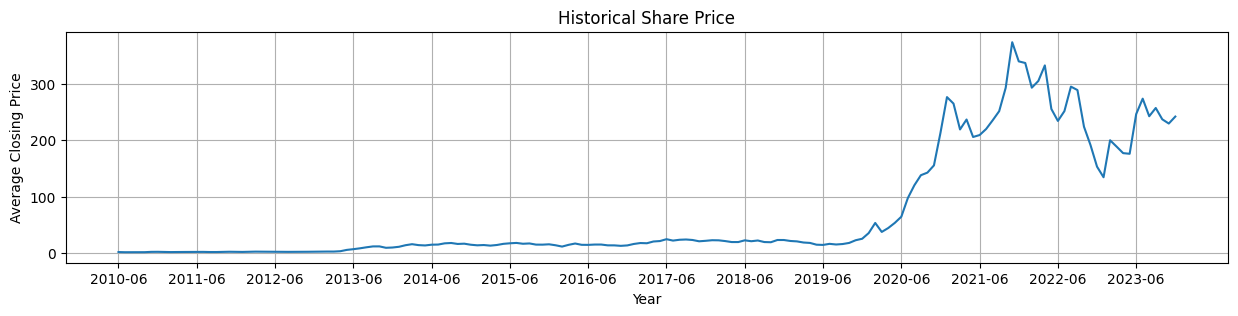

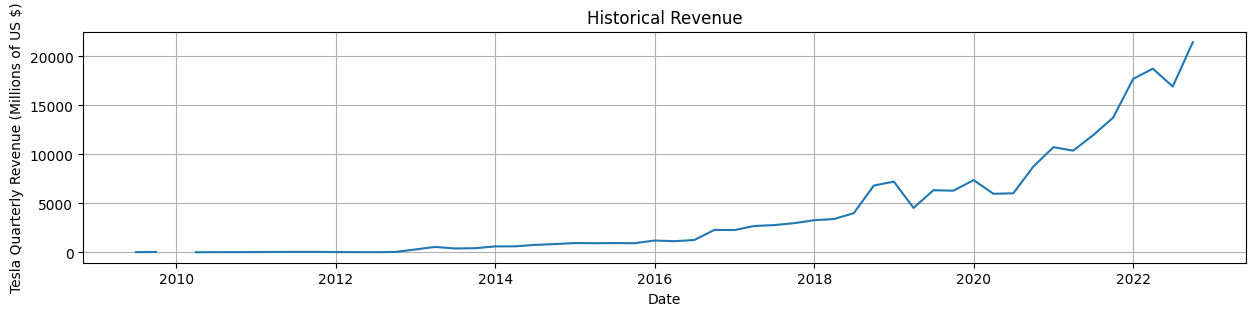

In [92]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Extract the year and month from the 'Date' column
tesla_data['YearMonth'] = tesla_data['Date'].dt.to_period('M')

# Group data by year-month and calculate the average closing price for each period
average_price_by_month = tesla_data.groupby('YearMonth')['Close'].mean()

# Plotting
plt.figure(figsize=(15, 3))

# Plot the line without data points
plt.plot(average_price_by_month.index.astype(str), average_price_by_month.values, linestyle='-', marker='')

plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.title('Historical Share Price')
plt.xticks(average_price_by_month.index.astype(str)[::12])  # Show only years on x-axis
plt.grid(True)
plt.show()

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "lxml")
    tables = pd.read_html(str(soup.find_all("table")))
    
    if tables:
        # Assuming you want to convert the second table (index 1) to a DataFrame
        df = tables[1]
        
        # Convert the 'Tesla Quarterly Revenue (Millions of US $)' column to numeric
        df["Tesla Quarterly Revenue (Millions of US $).1"] = pd.to_numeric(df["Tesla Quarterly Revenue (Millions of US $).1"].replace('[\$,]', '', regex=True))
        
        # Convert the 'Tesla Quarterly Revenue (Millions of US $)' column to datetime
        df["Tesla Quarterly Revenue (Millions of US $)"] = pd.to_datetime(df["Tesla Quarterly Revenue (Millions of US $)"])
        
        # Plotting
        plt.figure(figsize=(15, 3))
        plt.plot(df["Tesla Quarterly Revenue (Millions of US $)"], df["Tesla Quarterly Revenue (Millions of US $).1"])
        
        plt.xlabel('Date')
        plt.ylabel('Tesla Quarterly Revenue (Millions of US $)')
        plt.title('Historical Revenue')
        plt.grid(True)
        plt.show()
    else:
        print("No tables found on the webpage.")
else:
    print(f"Error! Failed to download webpage. Status code: {response.status_code}")



# GME revenue and Share Price Comparison

C:\Users\aliga\AppData\Local\Temp\ipykernel_23468\3445031198.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tesla_data['YearMonth'] = tesla_data['Date'].dt.to_period('M')


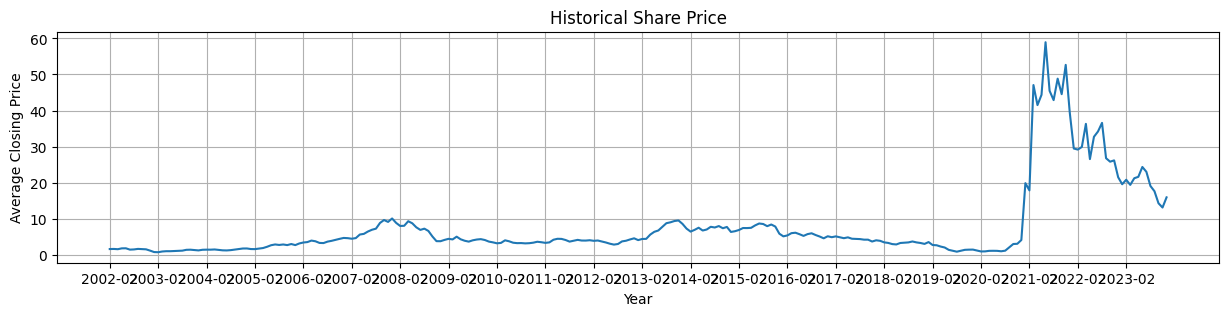

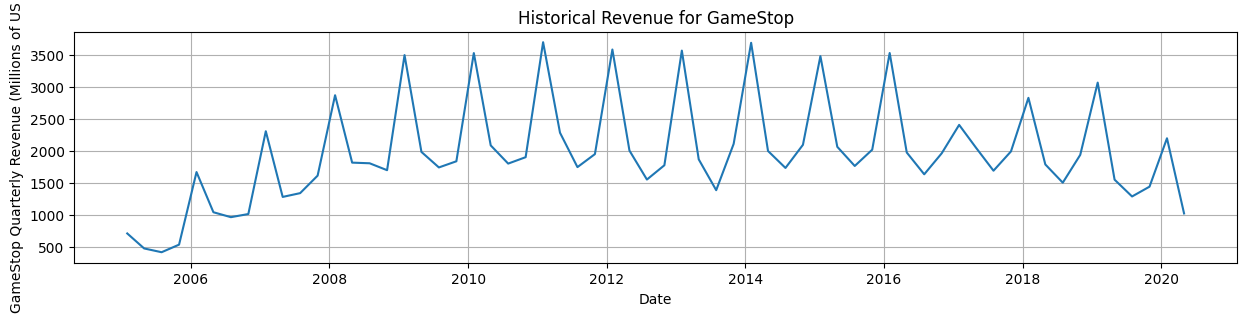

In [97]:
tesla = yf.Ticker("GME")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Extract the year and month from the 'Date' column
tesla_data['YearMonth'] = tesla_data['Date'].dt.to_period('M')

# Group data by year-month and calculate the average closing price for each period
average_price_by_month = tesla_data.groupby('YearMonth')['Close'].mean()

# Plotting
plt.figure(figsize=(15, 3))

# Plot the line without data points
plt.plot(average_price_by_month.index.astype(str), average_price_by_month.values, linestyle='-', marker='')

plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.title('Historical Share Price')
plt.xticks(average_price_by_month.index.astype(str)[::12])  # Show only years on x-axis
plt.grid(True)
plt.show()


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    tables = pd.read_html(str(soup.find_all("table")))

    if tables:
        # Assuming you want to convert the third table (index 2) to a DataFrame
        df = tables[1]  # Use index 1 for GameStop Quarterly Revenue
        
        # Convert the 'GameStop Quarterly Revenue (Millions of US $)' column to numeric
        df["GameStop Quarterly Revenue (Millions of US $).1"] = pd.to_numeric(
            df["GameStop Quarterly Revenue (Millions of US $).1"].replace('[\$,]', '', regex=True)
        )
        
        # Convert the 'GameStop Quarterly Revenue (Millions of US $)' column to datetime
        df["GameStop Quarterly Revenue (Millions of US $)"] = pd.to_datetime(df["GameStop Quarterly Revenue (Millions of US $)"])
        
        # Plotting
        plt.figure(figsize=(15, 3))
        plt.plot(df["GameStop Quarterly Revenue (Millions of US $)"], df["GameStop Quarterly Revenue (Millions of US $).1"])
        
        plt.xlabel('Date')
        plt.ylabel('GameStop Quarterly Revenue (Millions of US $)')
        plt.title('Historical Revenue for GameStop')
        plt.grid(True)
        plt.show()
    else:
        print("No tables found on the webpage.")
else:
    print(f"Error! Failed to download webpage. Status code: {response.status_code}")
